<a href="https://colab.research.google.com/github/eliasfeitoza/Curso-Data-Science-na-Pratica/blob/master/%5BTEMPLATE%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>


<center><img src="https://st.depositphotos.com/1062377/3824/i/450/depositphotos_38247575-stock-photo-various-travel-destination-in-japan.jpg" height= "250px" width= "500"></center>
<br>
<center><h1><b>Análise Exploratória dos Dados do Airbnb - Tokyo - Japão</center></h1></b>
<br>


* O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

* Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

* No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

* Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<br>
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
<br>
<center><b>Neste *notebook*, iremos analisar os dados referentes à cidade Tokyo no Japão, e ver quais insights podem ser extraídos a partir de dados brutos.</center></b>

<b><center><h2>Importação dos Pacotes</b></center></h2>


In [0]:
# importar os pacotes necessarios - Importanado as bibliotecas do Pandas do Python
import pandas as pd #Por regra de convensão deve se chamar a biblioteca pandas sempre da forma mencionada, facilitando assim a leitura por qualquer leitor.
import matplotlib.pyplot as plt # Trata-se da mais famosa biblioteca de visualização de gráficos de dados do Python. Por padrão deve ser acionada da forma mencionada.
import seaborn as sns # O Seaborn é uma biblioteca de visualização de dados do Python baseado no Matplotlib com uma melhor visualização.

%matplotlib inline 


<b><center><h2>Arquivo CSV</b></center></h2>

* “CSV” significa Comma Separated Values, ou seja, um arquivo CSV é um arquivo de valores separados por vírgula. Esse formato de armazenamento é simples e agrupa informações de arquivos de texto em planilhas, usado para trocas de dados com um banco de dados ou uma planilha entre aplicativos.
<br>
<br>

<center>Processo de importação do arquivo mostrado abaixo:</center>

In [0]:
# importar o arquivo listings.csv para um DataFrame- Criando a variavel df para receber o arquivo

df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2019-11-28/visualisations/listings.csv")

# Utilizado comando para remoção da coluna
df=df[df.columns.drop("neighbourhood_group")] 



<center><h2><b>Análise dos Dados</center></h2></b>

* Esta etapa tem como objetivo facilitar o entendimento dos campos inseridos no <b>DataSet (Tabela)</b> bem como facilitar a localização de algum dado específico e analisar se há informações em branco que interfira em nossa análise!!

* Obs:  <b>1 Iene japonês igual a 0,039 Real brasileiro</b>, para facilitar faça a comparação da seguinte forma: ¥ 26 lene é igual a R$ 1,02. Calculo efetuado em 19/02/2020. Pois os valoires informados no DataSet são valores da moeda corrente do país.


**Dicionário das variáveis**

* `id`- <i>número de id gerado para identificar o imóvel</i>	
* `Nome Propriedade`- <i> nome da propriedade anunciada</i>
* `Id do Anfitrião`<i>- número de id do proprietário (anfitrião) da propriedade</i>
* `Nome do Anfitrião`<i>- nome do anfitrião</i>
* `Vizinho`- <i>nome do bairro</i>
* `latitude`<i>- coordenada da latitude da propriedade</i>
* `longitude`<i> - coordenada da longitude da propriedade</i>
* `Tipo de Imóvel`<i>- informa o tipo do imóvel que é oferecido</i>
* `Preço`<i>- preço para alugar o imóvel,</i>
* `Minimo de Noites`<i> - quantidade mínima de noites para reservar</i>
* `Nº de Avalições`<i>- número de avaliações que a propriedade possui</i>
* `Ultima Avaliação`<i>- data da última avaliação</i>
* `Avaliações por Mês`<i>- quantidade de avaliações por mês</i>
* `Quantidade de Imóveis`<i> - quantidade de imóveis do mesmo anfitrião</i>
* `Avaliações no Ano`<i> - número de dias de disponibilidade dentro de 365 dias</i>


In [411]:

#Comando para renomear as colunas
df = df.rename(columns={"name":"Nome Propriedade","host_id":"Id do Anfitrião","host_name":"Nome do Anfitrião","neighbourhood":"Bairro","room_type":"Tipo de Imóvel","price":"Preço (lene)",
                        "minimum_nights":"Minimo de Noites","number_of_reviews":"Nº de Avalições","last_review":"Ultima Avaliação","reviews_per_month":"Avaliações por Mês",
                        "calculated_host_listings_count":"Quantidade de Imóveis","availability_365":"Disponibilidade x Dias no Ano"}) 
# mostrar as primeiras entradas solicitadas - comando head()
df.head(5)


,id,Nome Propriedade,Id do Anfitrião,Nome do Anfitrião,Bairro,latitude,longitude,Tipo de Imóvel,Preço (lene),Minimo de Noites,Nº de Avalições,Ultima Avaliação,Avaliações por Mês,Quantidade de Imóveis,Disponibilidade x Dias no Ano
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,Shibuya Ku,35.67152,139.71203,Private room,4160,28,18,2018-07-28,0.19,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.71721,139.82596,Entire home/apt,10948,3,160,2019-11-06,1.60,1,116
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,Nerima Ku,35.74267,139.65810,Entire home/apt,4270,30,111,2019-10-31,1.22,2,206
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",Setagaya Ku,35.66344,139.65593,Entire home/apt,7007,28,102,2019-11-20,1.47,3,211
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,Nerima Ku,35.74264,139.65832,Entire home/apt,4051,30,103,2019-10-04,1.19,2,0


### **Q1. Quais tipo de Acomodações estão disponíveis?**

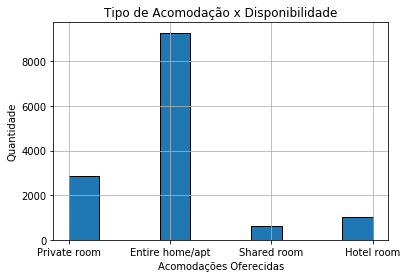

In [412]:
df['Tipo de Imóvel'].hist(bins = 10, edgecolor = 'Black') # Aplicando o gáfico histograma e definindo o tamanho com a propriedade bins e a cor da borda com edgecolor.
plt.title('Tipo de Acomodação x Disponibilidade') # Incluindo um Título ao gráfico
plt.xlabel('Acomodações Oferecidas') # Incluindo legenda no eixo x
plt.ylabel('Quantidade'); # Incluindo legenda no eixo y
# plt.show() ou ; para remoção de observações do sistema no gráfico, utilizando este comando o gráfico mostra somente observações pertinentes

In [413]:
df["Tipo de Imóvel"].value_counts() # Função .value_counts() para detalhar a quantidade dos dados da coluna Tipo de Imóvel


Entire home/apt    9286
Private room       2842
Hotel room         1021
Shared room         613
Name: Tipo de Imóvel, dtype: int64

* Como podemos observar no gáfico acima, as maiores disponibilidades de imóveis oferecidos na plataforma <b>Airbnb</b> nos bairros de Tokyo são: <b><i>Entire home/Apt</b></i> depois o <b><i>Private room;</b></i> as demais acomodações não há tanta divulgação. Para facilitar a visualização foi disponibilizado também uma legenda espelhando os dados do gráfico.

### **Q2. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

* Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

* Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. 


In [414]:
# identificar o volume de dados do DataFrame
print("Variáveis:{} ".format(df.shape[0]))  # Exibe na tela através do comando print a quantidade de Variáveis que o DataFrame possui.
print("Entradas: {}\n".format(df.shape[1])) # Exibe na tela através do comando print a quantidade de entradas que o DataFrame possui.
                                            # Comando \n utilizado para pular uma linha
                                            # Comando \t para dar um TAB se necessário
                                            # {} exibe os valores das Variáveis
                                            # Em Pythonshape() é usado em pandas para dar número de linha / coluna: Variáveis = Linhas e Entradas = Colunas
# O Comando display(df.dtypes) exibe o tipo de cada entrada do DataSete de forma integral
display(df.dtypes)


Variáveis:13762 
Entradas: 15



id                                 int64
Nome Propriedade                  object
Id do Anfitrião                    int64
Nome do Anfitrião                 object
Bairro                            object
latitude                         float64
longitude                        float64
Tipo de Imóvel                    object
Preço (lene)                       int64
Minimo de Noites                   int64
Nº de Avalições                    int64
Ultima Avaliação                  object
Avaliações por Mês               float64
Quantidade de Imóveis              int64
Disponibilidade x Dias no Ano      int64
dtype: object


**Há versão mais completa possui:** 

<b>* 13.762 Entradas</b>
<br>
<b>* 106 Variáveis</b>
<br>
nome do arquivo (`listings.csv.gz`).

### **Q3. Qual a porcentagem de valores ausentes no *dataset*?**

* Sem dúvidas, um dos processos que podem levar mais tempo para um Cientista de Dados, é realizar a limpeza e a preparação das informações.

* Esse processo pode ser custoso e demorado. É necessário identificar os dados que estão faltando e descobrir se existem possíveis valores que podem alterar o resultado. Sem o tratamento adequado, não é possível realizar uma análise concreta.

* Não só como se deparar com valores inconsistentes, dados não gravados e outliers. É importante conseguir “reformar” os dados para que possam ser utilizadas futuramente.

In [415]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes em percentual
percentage = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
df_n = pd.DataFrame(percentage)
df_n.style.format("{:.2%}")

,0
Avaliações por Mês,13.34%
Ultima Avaliação,13.34%
Nome do Anfitrião,0.08%
Disponibilidade x Dias no Ano,0.00%
Quantidade de Imóveis,0.00%
Nº de Avalições,0.00%
Minimo de Noites,0.00%
Preço (lene),0.00%
Tipo de Imóvel,0.00%
longitude,0.00%


### **Q4. Qual o tipo de distribuição das variáveis?** 

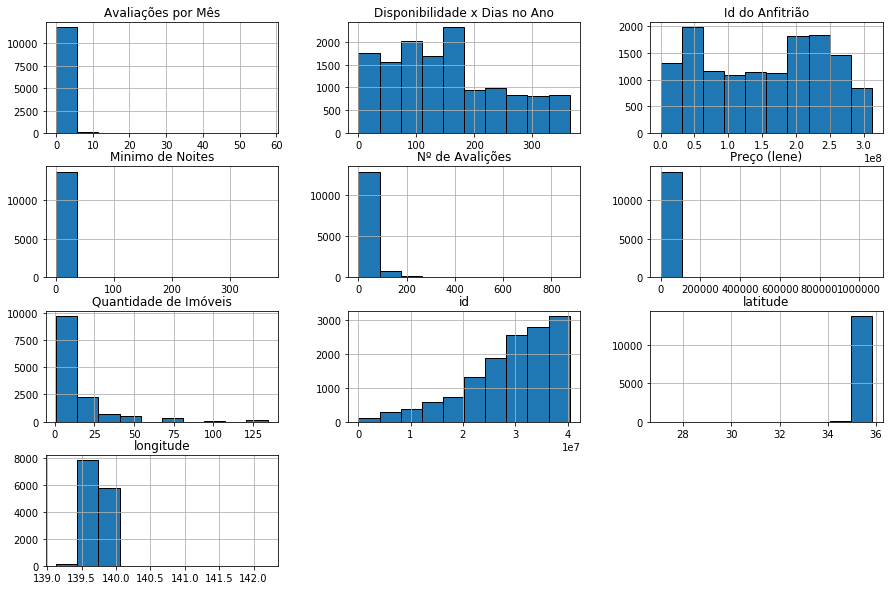

In [432]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10,edgecolor = "black", figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [449]:
# ver a média da coluna `price``
round(df[["Preço (lene)"]].mean(),2)


Preço (lene)    19204.68
dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [0]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


In [0]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média


In [0]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``

## Conclusões
